Import classes

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Read data files

In [224]:
Assoc_Salary = pd.read_csv('../Data/Associate_degree_money_made.csv', skiprows = 19, nrows = 9)
Bachelor_Salary = pd.read_csv('../Data/Bachelors_Weekly_Salary.csv', skiprows = 19, nrows = 9)
Associate_Cost_Data = pd.read_csv('../Data/Cost_of_College_2020.csv', skiprows = 49, nrows = 9)
Bachelor_Cost_Data = pd.read_csv('../Data/Cost_of_College_2020.csv', skiprows=49, nrows = 9)

Convert string to numbers

In [26]:
## Convert string to numbers
def cast_to_numeric(string):
    if type(string) == float:
        return string
    else:
        string = string.replace(',', '').replace('$', '')
        number = float(string)
        return number

Yearly salary of each degree

In [183]:
## Associate Yearly Salary
Associate_Quarters_Total = Assoc_Salary['Qtr1'] + Assoc_Salary['Qtr2'] + Assoc_Salary['Qtr3'] + Assoc_Salary['Qtr4']
Associate_Yearly_Salary = Associate_Quarters_Total / 4 * 52

## Bachelor Yearly Salary
Bachelor_Quarters_Total = Bachelor_Salary['Qtr1'] + Bachelor_Salary['Qtr2'] + Bachelor_Salary['Qtr3'] + Bachelor_Salary['Qtr4']
Bachelor_Yearly_Salary = Bachelor_Quarters_Total / 4 * 52

The cost of college degrees

In [176]:
## Cost of Associate Degree
Associate_Cost_Data['8,868'] = Associate_Cost_Data['8,868'].apply(cast_to_numeric)
Total_Associate_Cost = Associate_Cost_Data['8,868'] * 2

## Cost of Bachelor Degree
Bachelor_Cost_Data['22,074'] = Bachelor_Cost_Data['22,074'].apply(cast_to_numeric)
Total_Bachelor_Cost = Bachelor_Cost_Data['22,074'] * 4

How many years to pay off degrees

In [219]:
## Years to pay off Associate degree
AS_Years_Paid_Off = Total_Associate_Cost / (Associate_Yearly_Salary * 0.08)

## Years to pay off Bachelor degree
BA_Years_Paid_Off = Total_Bachelor_Cost / (Bachelor_Yearly_Salary * 0.08)

How many years to pay off debt if you don't graduate on time

In [221]:
## If someone went to a 4 year for 6 years
Six_Year_Total_Bachelor_Cost = Bachelor_Cost_Data['22,074'] * 6
Six_Year_BA_Years_Paid_Off = Six_Year_Total_Bachelor_Cost / (Bachelor_Yearly_Salary * 0.08)

## If someone went to a 4 year for 5 years
Five_Year_Total_Bachelor_Cost = Bachelor_Cost_Data['22,074'] * 5
Five_Year_BA_Years_Paid_Off = Five_Year_Total_Bachelor_Cost / (Bachelor_Yearly_Salary * 0.08)

## If someone went to a 4 year for 3 years
Three_Year_Total_Bachelor_Cost = Bachelor_Cost_Data['22,074'] * 3
Three_Year_BA_Years_Paid_Off = Three_Year_Total_Bachelor_Cost / (Bachelor_Yearly_Salary * 0.08)

## If someone went to a 4 year for 2 years
Two_Year_Total_Bachelor_Cost = Bachelor_Cost_Data['22,074'] * 2
Two_Year_BA_Years_Paid_Off = Two_Year_Total_Bachelor_Cost / (Bachelor_Yearly_Salary * 0.08)

In [258]:
## If someone went to a 2 year for 3 years
Three_Year_Total_Associate_Cost = Associate_Cost_Data['8,868'] * 3
Three_Year_AS_Years_Paid_Off = Three_Year_Total_Associate_Cost / (Associate_Yearly_Salary * 0.08)
## If someone went to a 2 year for 1 year
One_Year_Total_Associate_Cost = Associate_Cost_Data['8,868']
One_Year_AS_Years_Paid_Off = One_Year_Total_Associate_Cost / (Associate_Yearly_Salary * 0.08)

Money made from degrees after a certain period of time

In [187]:
## Money made from Bachelor Degree after 5 years
Five_Years_After_Bachelor = Bachelor_Yearly_Salary * 5
## 10 years
Ten_Years_After_Bachelor = Bachelor_Yearly_Salary * 10
## 15 years
Fifteen_Years_After_Bachelor = Bachelor_Yearly_Salary * 15
## 20 years
Twenty_Years_After_Bachelor = Bachelor_Yearly_Salary * 20

In [186]:
## Money made from Associate Degree after 5 years
Five_Years_After_Associate = Associate_Yearly_Salary * 5
## 10 years
Ten_Years_After_Associate = Associate_Yearly_Salary * 10
## 15 years
Fifteen_Years_After_Associate = Associate_Yearly_Salary * 15
## 20 years
Twenty_Years_After_Associate = Associate_Yearly_Salary * 20

Descriptive Statstics

In [235]:
AYSDS = Associate_Yearly_Salary.describe()
BYSDS = Bachelor_Yearly_Salary.describe()

TACDS = Total_Associate_Cost.describe()
TBCDS = Total_Bachelor_Cost.describe()

AYPODS = AS_Years_Paid_Off.describe()
BYPODS = BA_Years_Paid_Off.describe()

SYBAYPODS = Six_Year_BA_Years_Paid_Off.describe()
FYBAYPODS = Five_Year_BA_Years_Paid_Off.describe()
THYBAYPODS = Three_Year_Total_Bachelor_Cost.describe()
TYBAYPODS = Two_Year_BA_Years_Paid_Off.describe()

THYASYPODS = Three_Year_AS_Years_Paid_Off.describe()
TYASYPODS = One_Year_AS_Years_Paid_Off.describe()

FYABDS = Five_Years_After_Bachelor.describe()
TENYABDS = Ten_Years_After_Bachelor.describe()
FIYABDS = Fifteen_Years_After_Bachelor.describe()
TWYABDS = Twenty_Years_After_Bachelor.describe()

FYAADS = Five_Years_After_Associate.describe()
TENYAADS = Ten_Years_After_Associate.describe()
FIYAADS = Fifteen_Years_After_Associate.describe()
TWYAADS = Twenty_Years_After_Associate.describe()

Visuals

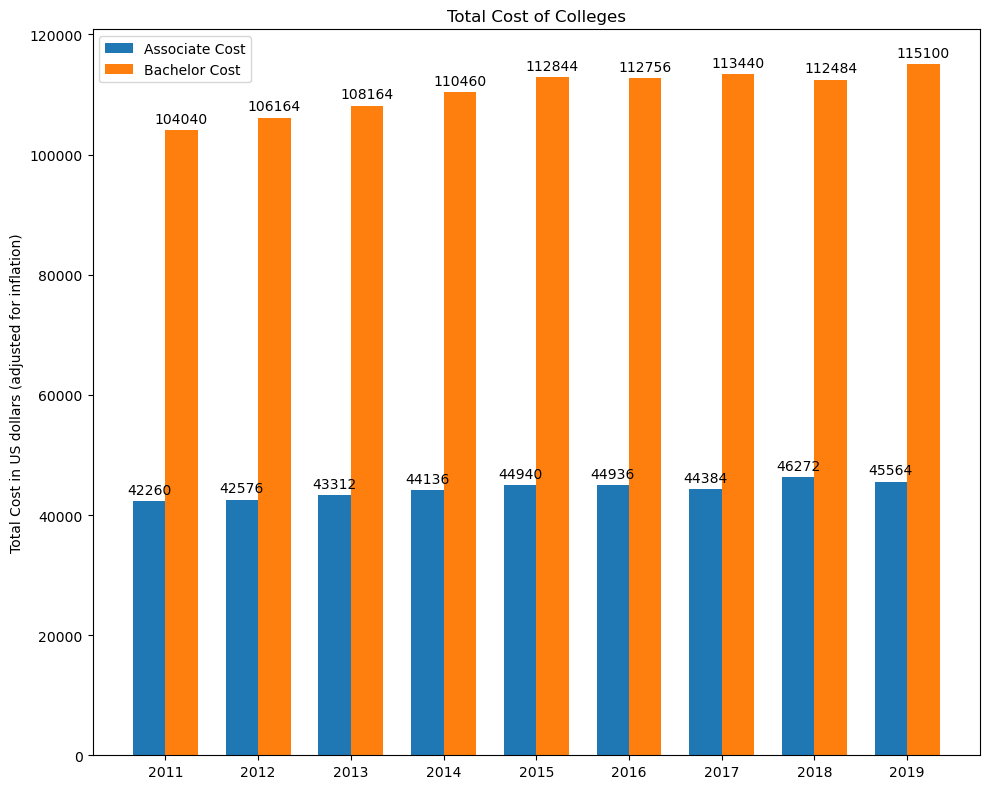

In [236]:
## Associate vs Bachelor Costs each year
labels = ['2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']
Bar_Chart_Associate_Cost = [42260, 42576, 43312, 44136, 44940, 44936, 44384, 46272, 45564]
Bar_Chart_Bachelor_Cost = [104040, 106164, 108164, 110460, 112844, 112756, 113440, 112484, 115100]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, Bar_Chart_Associate_Cost, width, label = 'Associate Cost')
rects2 = ax.bar(x + width/2, Bar_Chart_Bachelor_Cost, width, label = 'Bachelor Cost')

ax.set_ylabel('Total Cost in US dollars (adjusted for inflation)')
ax.set_title('Total Cost of Colleges')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

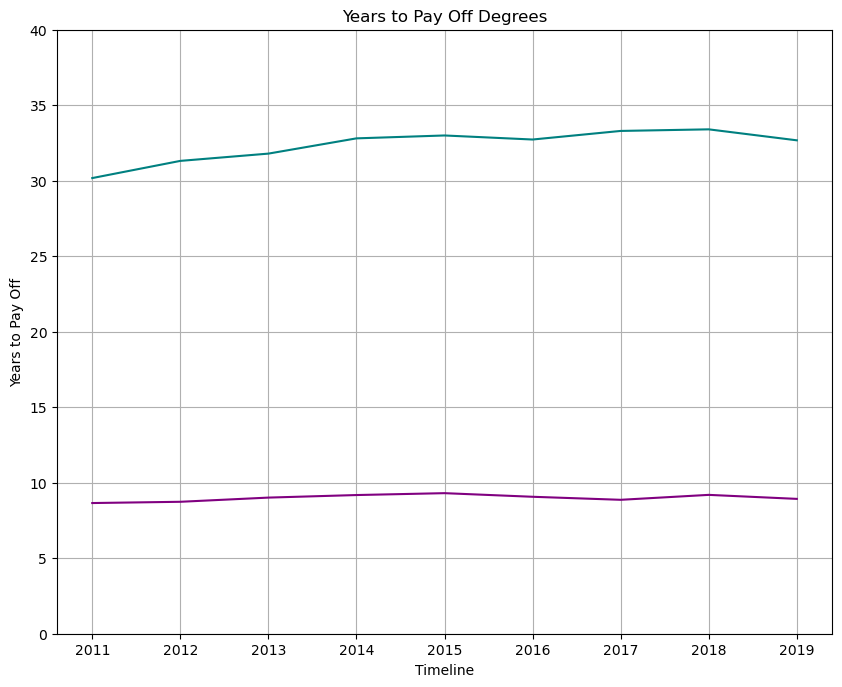

In [251]:
## How long to pay off each degree from the academic year 2011-2012 to 2019-2020
x = 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019
S1 = AS_Years_Paid_Off
S2 = BA_Years_Paid_Off

fig, ax = plt.subplots()
ax.plot(x, S1, label='Associate Degree', color='purple')
ax.plot(x, S2, label='Bachelor Degree', color='teal')
ax.set_ylim([0, 40])
ax.set_title('Years to Pay Off Degrees')
ax.set_xlabel('Timeline')
ax.set_ylabel('Years to Pay Off')
ax.grid()

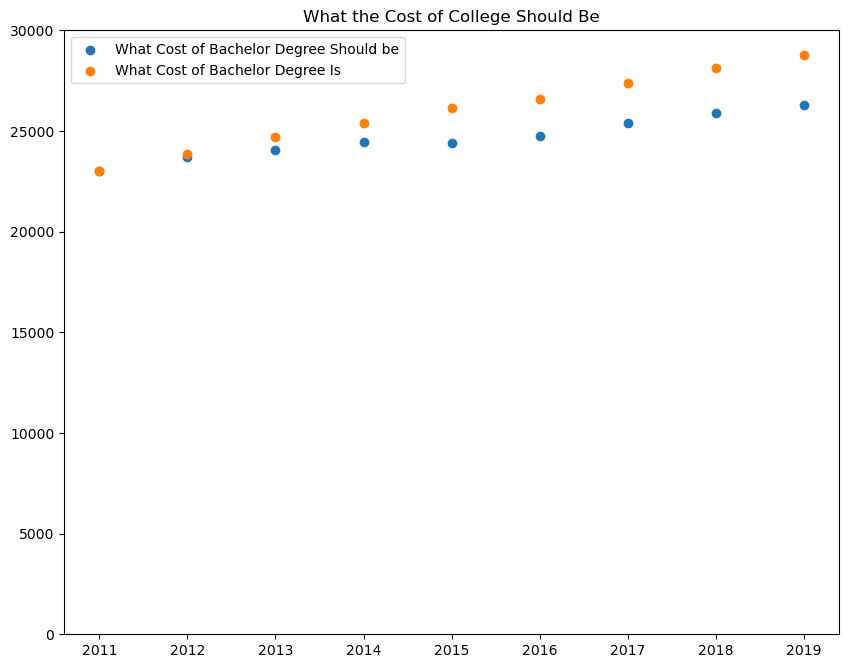

In [211]:
## This graph shows the cost of just one year of college, not all four years combined
IDEK_Bachelor = Bachelor_Cost_Data['22,074']
Bachelor_Cost_Data['22,074'] = Bachelor_Cost_Data['22,074'].apply(cast_to_numeric)

x = 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019
y1 = 23011, 23684, 24061, 24441, 24419, 24755, 25374, 25899, 26301
y2 = Bachelor_Cost_Data['22,074']

plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
plt.scatter(x, y1, label=f'What Cost of Bachelor Degree Should be')
plt.scatter(x, y2, label=f'What Cost of Bachelor Degree Is')
plt.ylim([0,30000])

plt.title('What the Cost of College Should Be')
plt.legend()
plt.show()

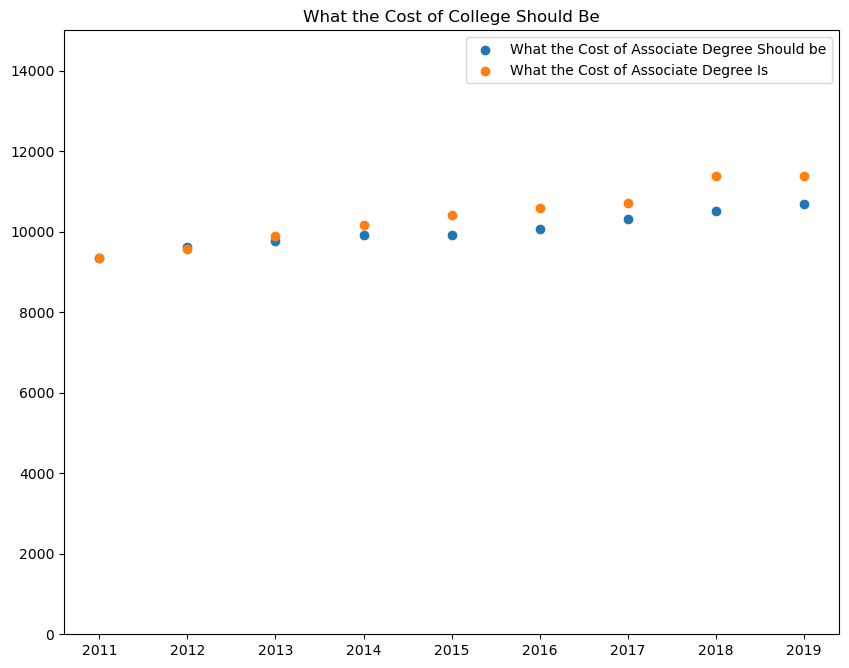

In [238]:
## This graph shows the cost of just one year of college, not all four years combined
IDEK_Associate = Associate_Cost_Data['8,868']
Associate_Cost_Data['8,868'] = Associate_Cost_Data['8,868'].apply(cast_to_numeric)

x = 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019
y1 = 9347, 9620, 9773, 9928, 9919, 10055, 10306, 10520, 10683
y2 = Associate_Cost_Data['8,868']

plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
plt.scatter(x, y1, label=f'What the Cost of Associate Degree Should be')
plt.scatter(x, y2, label=f'What the Cost of Associate Degree Is')
plt.ylim([0,15000])

plt.title('What the Cost of College Should Be')
plt.legend()
plt.show()

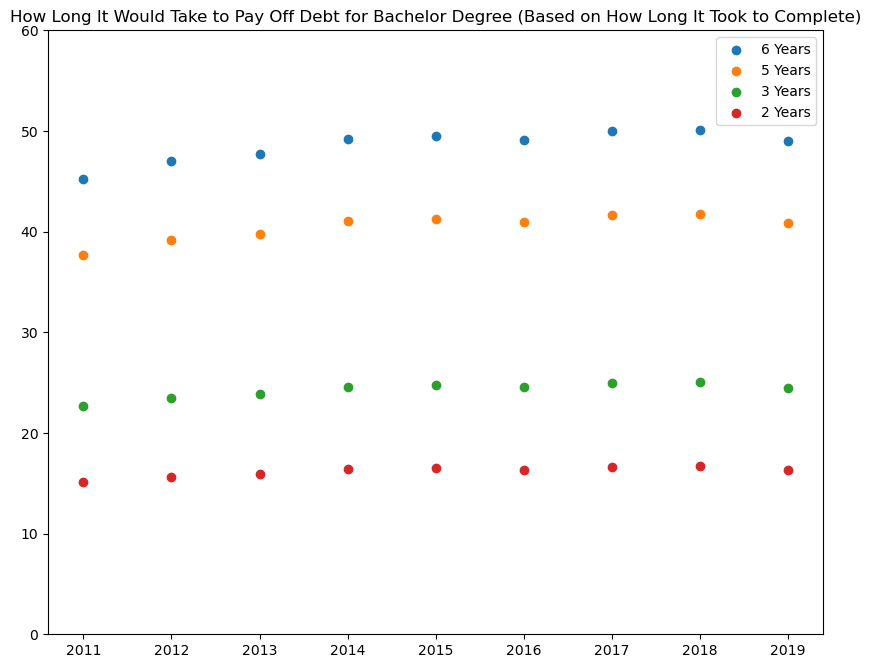

In [230]:
## This graph shows How Long It Would Take to Pay Off Debt for Bachelor Degree (Based on How Long It Took to Complete)
x = 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019
y1 = Six_Year_BA_Years_Paid_Off
y2 = Five_Year_BA_Years_Paid_Off
y3 = Three_Year_BA_Years_Paid_Off
y4 = Two_Year_BA_Years_Paid_Off


plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
plt.scatter(x, y1, label=f'6 Years')
plt.scatter(x, y2, label=f'5 Years')
plt.scatter(x, y3, label=f'3 Years')
plt.scatter(x, y4, label=f'2 Years')
plt.ylim([0,60])

plt.title('How Long It Would Take to Pay Off Debt for Bachelor Degree (Based on How Long It Took to Complete)')
plt.legend()
plt.show()

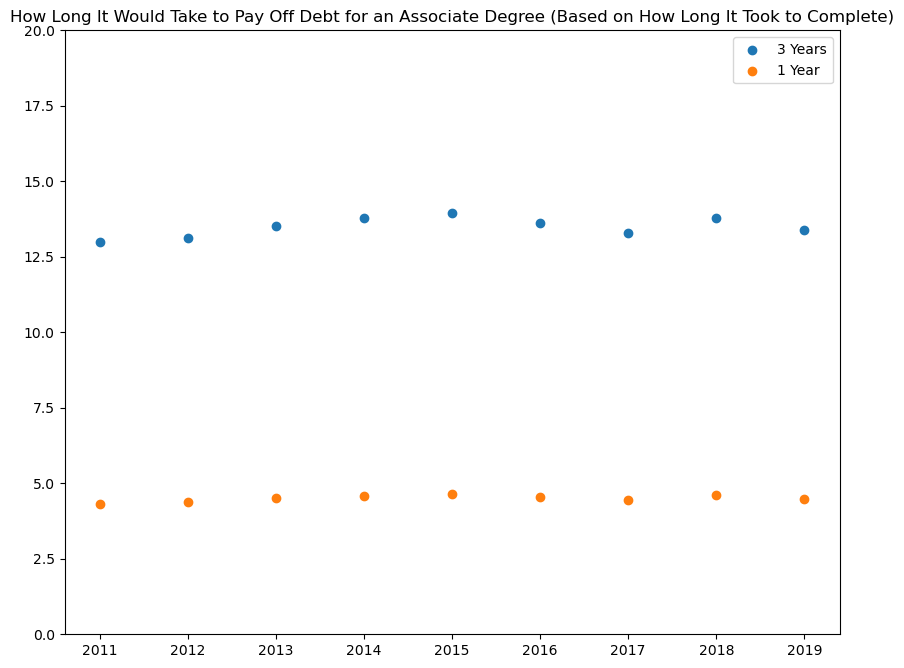

In [260]:
## This graph shows How Long It Would Take to Pay Off Debt for Bachelor Degree (Based on How Long It Took to Complete)
x = 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019
y1 = Three_Year_AS_Years_Paid_Off
y2 = One_Year_AS_Years_Paid_Off


plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
plt.scatter(x, y1, label=f'3 Years')
plt.scatter(x, y2, label=f'1 Year')
plt.ylim([0,20])

plt.title('How Long It Would Take to Pay Off Debt for an Associate Degree (Based on How Long It Took to Complete)')
plt.legend()
plt.show()

In [158]:
print(Five_Years_After_Associate)
print()
print(Ten_Years_After_Associate)
print()
print(Fifteen_Years_After_Associate)
print()
print(Twenty_Years_After_Associate)

0    135005.0
1    136955.0
2    137150.0
3    138190.0
4    139750.0
5    146055.0
6    150865.0
7    154830.0
8    159445.0
dtype: float64

0    270010.0
1    273910.0
2    274300.0
3    276380.0
4    279500.0
5    292110.0
6    301730.0
7    309660.0
8    318890.0
dtype: float64

0    405015.0
1    410865.0
2    411450.0
3    414570.0
4    419250.0
5    438165.0
6    452595.0
7    464490.0
8    478335.0
dtype: float64

0    540020.0
1    547820.0
2    548600.0
3    552760.0
4    559000.0
5    584220.0
6    603460.0
7    619320.0
8    637780.0
dtype: float64


In [159]:
print(Five_Years_After_Bachelor)
print()
print(Ten_Years_After_Bachelor)
print()
print(Fifteen_Years_After_Bachelor)
print()
print(Twenty_Years_After_Bachelor)

0    135005.0
1    136955.0
2    137150.0
3    138190.0
4    139750.0
5    146055.0
6    150865.0
7    154830.0
8    159445.0
dtype: float64

0    270010.0
1    273910.0
2    274300.0
3    276380.0
4    279500.0
5    292110.0
6    301730.0
7    309660.0
8    318890.0
dtype: float64

0    405015.0
1    410865.0
2    411450.0
3    414570.0
4    419250.0
5    438165.0
6    452595.0
7    464490.0
8    478335.0
dtype: float64

0    540020.0
1    547820.0
2    548600.0
3    552760.0
4    559000.0
5    584220.0
6    603460.0
7    619320.0
8    637780.0
dtype: float64
